In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_features = iris.feature_names

iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [5]:
data=pd.concat([df_data,df_labels],axis=1)

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


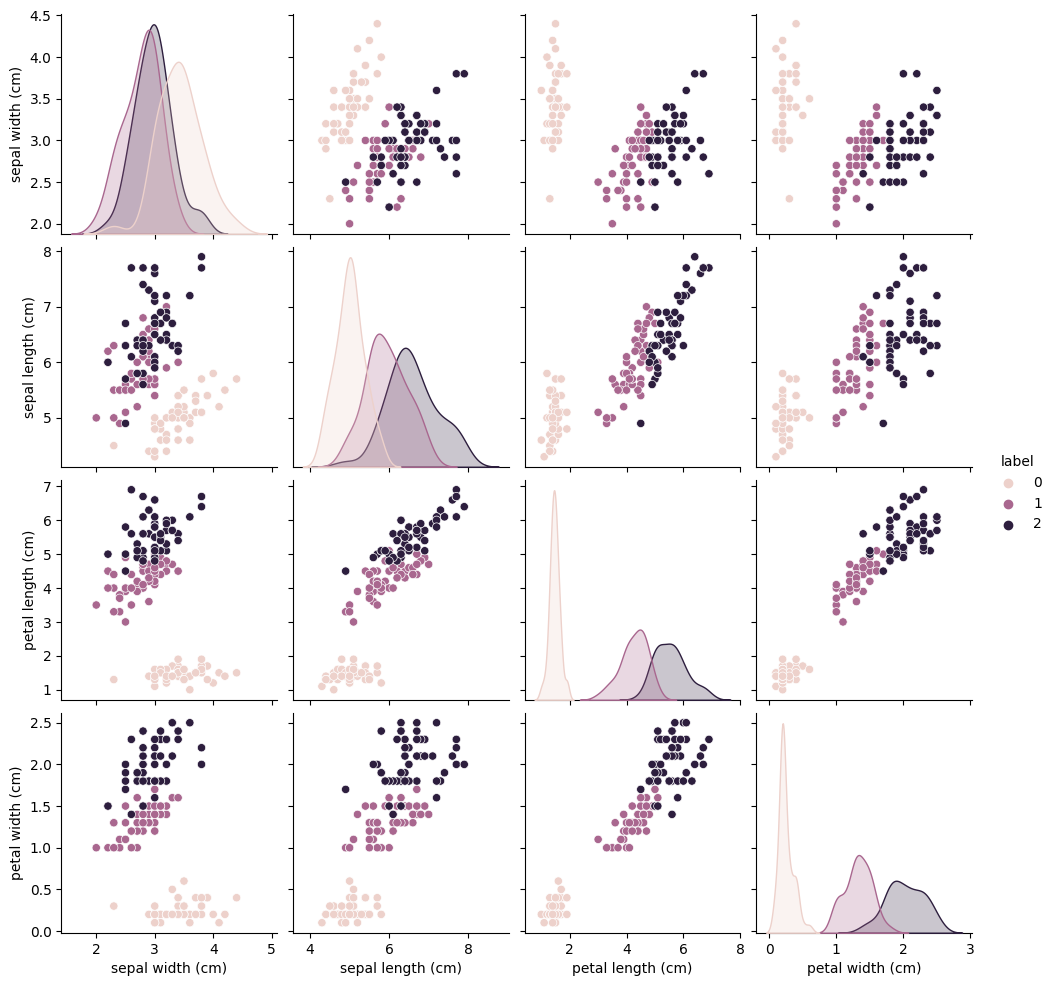

In [ ]:
import seaborn as sns

sns.pairplot(data,
             vars=['sepal width (cm)','sepal length (cm)','petal length (cm)','petal width (cm)'],
            hue ='label')
plt.show()

<Axes: xlabel='label', ylabel='sepal width (cm)'>

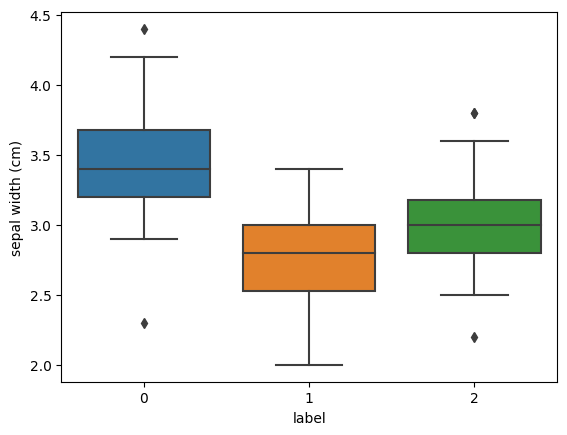

In [8]:
sns.boxplot(x='label',y='sepal width (cm)',data=data)

In [14]:
#Splitting the data into training and test test
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0) 

In [15]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [16]:
model = build_model() 
model.fit(X_train, y_train, epochs=80, batch_size=4, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 60ms/step - loss: 0.0225 - mae: 0.1104


In [17]:
test_mae_score

0.11040161550045013